#PROBLEM STATEMENT

As a football analyst in mchezo pesa ltd. you are tasked to Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly - using five features i.e Home team, Away team, Tournament type, Rank of home team and Rank of away team



#APPROACH 1 - polynomial regression
Create a model that can predict how many goals the home team scores



#Approach 2- Logistic regression
Create a model that can predict whether the home team will win, draw or lose



#METRICS FOR SUCCESS

For Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model. The predictive power of the logistic regression model will be measured using the accuracy score and the f1_score

#PROCESS

step 1.  import required  library to the environment  
Step 2. Load the data sets to read.  
Step 3. Perform preprocessing on the data- cleaning the data, looking for   missing values, check outliers etc  
step 4. Merge the datasets    
step 5. perform EDA univeriate/ bivariate analysis  
step 7 Perform any necessary feature engineering   
step 8 Check of multicollinearity    
step 9. Start building the model  
step 10 Cross-validate the model  
step 11. Compute RMSEstep  
step 12 Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test  

step 13 Perform appropriate regressions on the data including your justification  
 step 14 Challenge your solution by providing insights on how you can make improvements.      
step 15. Conclusion  


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
import requests
from io import StringIO
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')



In [ ]:
#reading data
fifa= pd.read_csv("fifa_ranking.csv")
fifa.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#checking the dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
#checking for missing values
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
#checkikg the statistical summary of fifa ranking data set
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
#checking duplicates
fifa.duplicated().any()

True

In [ ]:
# Removing duplicates

fifa.drop_duplicates(keep='first', inplace = True)

In [ ]:
# Checking whether the duplicates have been removed
#
fifa.duplicated().any()

False

In [ ]:
#reading results dataframe
results = pd.read_csv("results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#previewing the dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Previewing some statistical summaries of the results dataset
#
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# Checking for missing values of the results dataset
#
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# Checking for duplicates
#
results.duplicated().any()

False

In [ ]:
# Merging the dataset
#Renaming country column on fifa dataset
fifa.rename(columns = {'country_full':'country'}, inplace = True)
merged = pd.merge(fifa,results)
merged.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


In [ ]:
# dropping columns that are not required
New_merged = merged.drop(['country_abrv','rank_date','date','neutral','city'],axis=1)
New_merged.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Germany,Switzerland,1,0,Friendly
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Germany,Belgium,0,3,Friendly
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Germany,Netherlands,1,2,Friendly
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Germany,Switzerland,6,2,Friendly
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Germany,Austria,1,2,Friendly


In [ ]:
# checking for missing data
New_merged.isnull().value_counts()

rank   country  total_points  previous_points  rank_change  cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  three_year_ago_weighted  confederation  home_team  away_team  home_score  away_score  tournament
False  False    False         False            False        False         False                  False          False                   False             False                  False               False                    False          False      False      False       False       False         10240701
dtype: int64

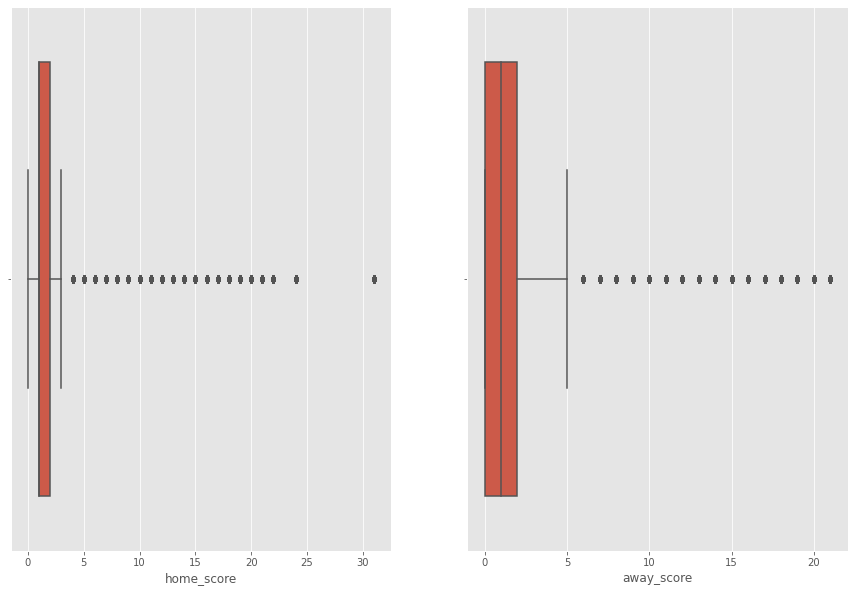

In [ ]:
# Checking for outliers
numeric_cols = ["home_score","away_score"]
fig,axes = plt.subplots(nrows=1, ncols=2 ,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),New_merged,numeric_cols):
  sns.boxplot(New_merged[column],ax=ax)

In [ ]:
# Replacing the outliers with mean
mean1 = New_merged["home_score"].mean()
outlierfilter1 =New_merged["home_score"]>3
New_merged.loc[outlierfilter1,"home_score"] = mean1

mean2 = New_merged["away_score"].mean()
outlierfilter2 = New_merged["away_score"]>5
New_merged.loc[outlierfilter2,"away_score"] = mean2

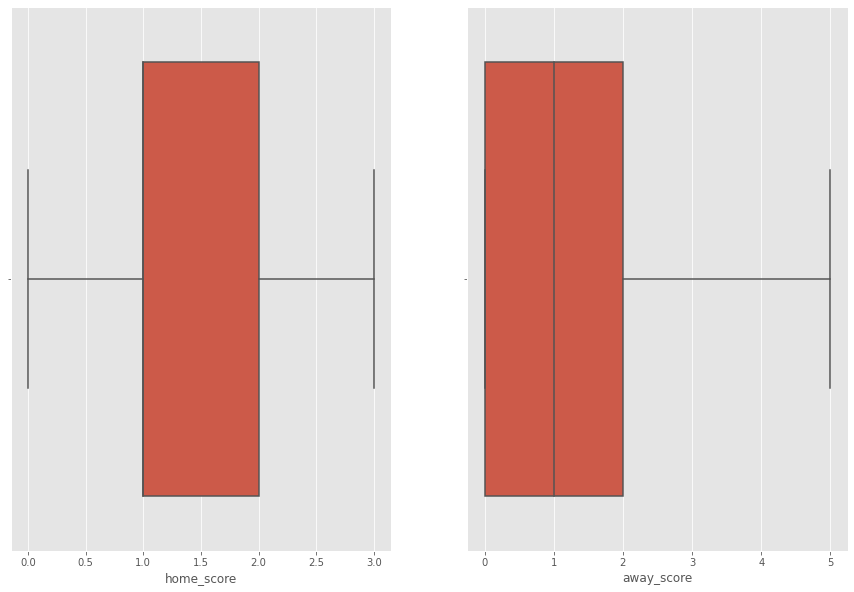

In [ ]:
# Rechecking the outliers
numeric_cols = ["home_score","away_score"]
fig,axes = plt.subplots(nrows=1, ncols=2 ,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),New_merged,numeric_cols):
  sns.boxplot(New_merged[column],ax=ax)

In [ ]:
# Getting a summary of the data
New_merged.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07
mean,6.913781e+01,1.723203e+02,4.596894e+02,-2.487730e-02,8.696770e+01,8.696770e+01,8.602791e+01,4.301402e+01,8.486915e+01,2.546078e+01,8.437956e+01,1.687593e+01,1.303730e+00,1.096957e+00
std,5.084940e+01,3.364306e+02,3.536158e+02,5.380187e+00,1.766095e+02,1.766095e+02,1.766132e+02,8.830662e+01,1.738576e+02,5.215731e+01,1.730509e+02,3.461018e+01,9.505961e-01,1.146871e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,0.000000e+00,1.400000e+02,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,6.100000e+01,0.000000e+00,4.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.050000e+02,1.948700e+02,6.600000e+02,1.000000e+00,8.279000e+01,8.279000e+01,8.179000e+01,4.090000e+01,7.841000e+01,2.352000e+01,7.845000e+01,1.569000e+01,2.000000e+00,2.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,1.158660e+03,1.158660e+03,1.169570e+03,5.847900e+02,1.159710e+03,3.479100e+02,1.200770e+03,2.401500e+02,3.000000e+00,5.000000e+00


###**Exploratory Analysis**
This involves calculating the Mean, Median, Standard Deviation, Kurtosis/skewness & distribution/range.

We'll also use visualizations to better understand our data.

In [ ]:
# Measures of central tendency
print(New_merged['home_score'].mean())
print(New_merged['home_score'].mode())
print(New_merged['home_score'].median())

1.3037300042053885
0    1.0
dtype: float64
1.0


In [ ]:
print(New_merged['away_score'].mean())
print(New_merged['away_score'].mode())
print(New_merged['away_score'].median())

1.0969566267049045
0    0.0
dtype: float64
1.0


Since the mean is greater than the mode in both the age and household columns, the distributions are positively skewed.



In [ ]:
# Measures of dispersion for home score
print(New_merged['home_score'].std())
print(New_merged['home_score'].var())

print(New_merged['home_score'].skew())
print(New_merged['home_score'].kurt())

0.9505960602884364
0.9036328698358965
0.13075346618415312
-0.8888723584343454


In [ ]:
print(New_merged['away_score'].std())
print(New_merged['away_score'].var())

print(New_merged['away_score'].skew())
print(New_merged['away_score'].kurt())

1.1468712615050292
1.3153136904661369
1.098452479794261
0.8996094754914181


In [ ]:
# Calculating the min and max for the home and away columns
#home scores
min_home = New_merged['home_score'].min()
print('minimum score',min_home)
max_home = New_merged['home_score'].max()
print('maximum score',max_home)
#away scores
min_away = New_merged['away_score'].min()
print('minimum score',min_away)
max_away = New_merged['away_score'].max()
print('maximum score',max_away)

minimum score 0.0
maximum score 3.0
minimum score 0.0
maximum score 5.0


3 was the highest score for the home matches while 5 was the highest score for the away matches.

In [ ]:
#Calculating quantiles
quantile_home = New_merged["home_score"].quantile([0.25,0.5,0.75])
print(quantile_home)
quantile_away = New_merged["away_score"].quantile([0.25,0.5,0.75])
print(quantile_away)

0.25    1.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64
0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


###**Univariate Analysis**

Text(0.5, 1.0, 'Country Participation')

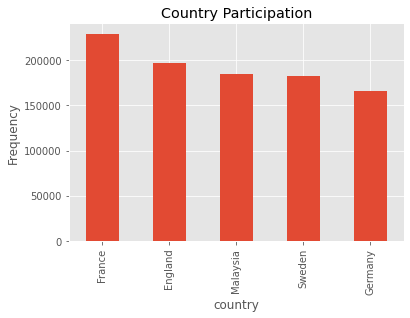

In [ ]:
New_merged['country'].value_counts().head().plot.bar()
plt.xlabel("country")
plt.ylabel("Frequency")
plt.title("Country Participation")

Text(0.5, 1.0, 'Country Participation')

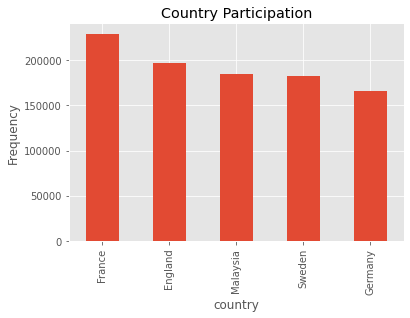

In [ ]:
New_merged['country'].value_counts().head().plot.bar()
plt.xlabel("country")
plt.ylabel("Frequency")
plt.title("Country Participation")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b8ce066d0>,
      dtype=object)

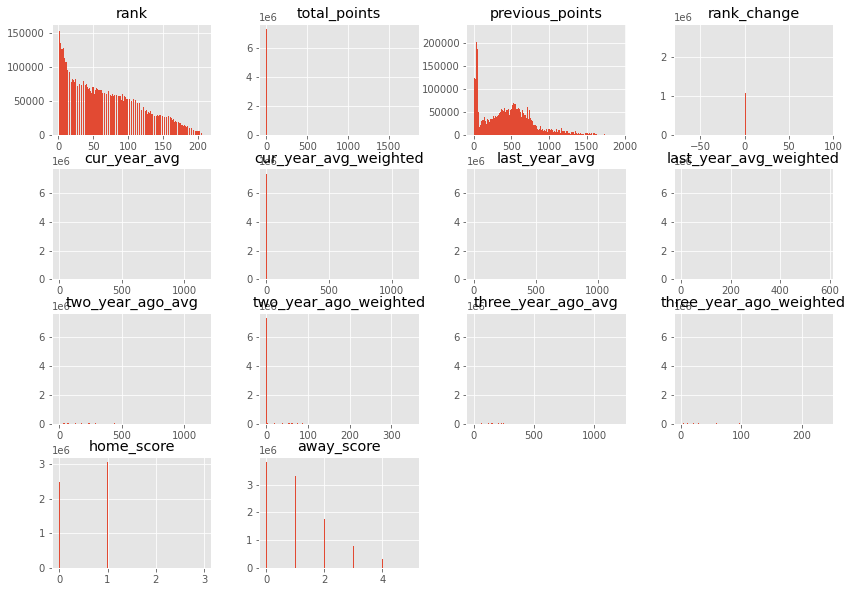

In [ ]:
New_merged.hist(bins='auto', figsize=(14, 10))

###**Bivariate Analysis**

In [ ]:
# Calculating correlation
correlation_df = New_merged.corr()
correlation_df

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
rank,1.000000,-0.280537,-0.625583,-0.057668,-0.281540,-0.281540,-0.260476,-0.260476,-0.252044,-0.252044,-0.245878,-0.245877,-0.109248,0.072962
total_points,-0.280537,1.000000,0.532221,0.017485,0.977570,0.977570,0.941783,0.941783,0.932176,0.932176,0.924420,0.924420,0.034004,-0.017983
previous_points,-0.625583,0.532221,1.000000,-0.023381,0.523567,0.523567,0.501861,0.501861,0.489813,0.489813,0.483172,0.483172,0.072904,-0.043419
rank_change,-0.057668,0.017485,-0.023381,1.000000,0.038874,0.038874,-0.011049,-0.011049,-0.000912,-0.000912,0.001080,0.001081,0.000266,-0.000442
cur_year_avg,-0.281540,0.977570,0.523567,0.038874,1.000000,1.000000,0.865885,0.865886,0.878200,0.878200,0.866941,0.866942,0.032633,-0.016460
cur_year_avg_weighted,-0.281540,0.977570,0.523567,0.038874,1.000000,1.000000,0.865885,0.865886,0.878200,0.878200,0.866941,0.866942,0.032633,-0.016460
last_year_avg,-0.260476,0.941783,0.501861,-0.011049,0.865885,0.865885,1.000000,1.000000,0.863839,0.863839,0.882858,0.882858,0.032319,-0.017609
last_year_avg_weighted,-0.260476,0.941783,0.501861,-0.011049,0.865886,0.865886,1.000000,1.000000,0.863839,0.863839,0.882858,0.882858,0.032319,-0.017609
two_year_ago_avg,-0.252044,0.932176,0.489813,-0.000912,0.878200,0.878200,0.863839,0.863839,1.000000,1.000000,0.868890,0.868890,0.032429,-0.017690
two_year_ago_weighted,-0.252044,0.932176,0.489813,-0.000912,0.878200,0.878200,0.863839,0.863839,1.000000,1.000000,0.868890,0.868891,0.032429,-0.017690
